In [1]:
import pandas as pd    # for reading and manipulating tabular data
import networkx as nx  # for constructing and studying networks
import numpy as np     # for arrays
#import community           # for community structure later
import collections          # for manipulation tuples and zipping objects
import statistics as stats  # for generating summary statistics
import time                 # for measuring computating time
from matplotlib import pyplot as plt  # for outputting nice plots
import seaborn as sns                 # for creating even nicer plots

get_ipython().magic(u'matplotlib inline')

C:\Users\wr2zzgx\AppData\Local\Temp\ipykernel_18628\409953928.py:11: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic(u'matplotlib inline')


## Reading the data

In [253]:
# Create graph from edge list stored in data file
G = nx.read_edgelist(
    'twitter_combined.txt',      # File name 
    create_using = nx.Graph(),   # Use DiGraph() for directed graph, 
    nodetype = int               # Specifying node information type
) 

## Printing some statistics

In [254]:
G_nodes = G.nodes()
G_edges = G.edges()

print(type(G_nodes))
print(type(G_edges))

print(str(len(G_nodes)) + ' nodes, ' + str(len(G_edges)) + ' edges')

<class 'networkx.classes.reportviews.NodeView'>
<class 'networkx.classes.reportviews.EdgeView'>
81306 nodes, 1342310 edges


## Plotting the degree distribution

In [255]:
degree_count = collections.Counter([node[1] for node in G.degree])
deg, cnt = zip(*degree_count.items())

degSort = np.array(deg)[np.argsort(np.array(deg))]
cntSort = np.array(cnt)[np.argsort(np.array(deg))]

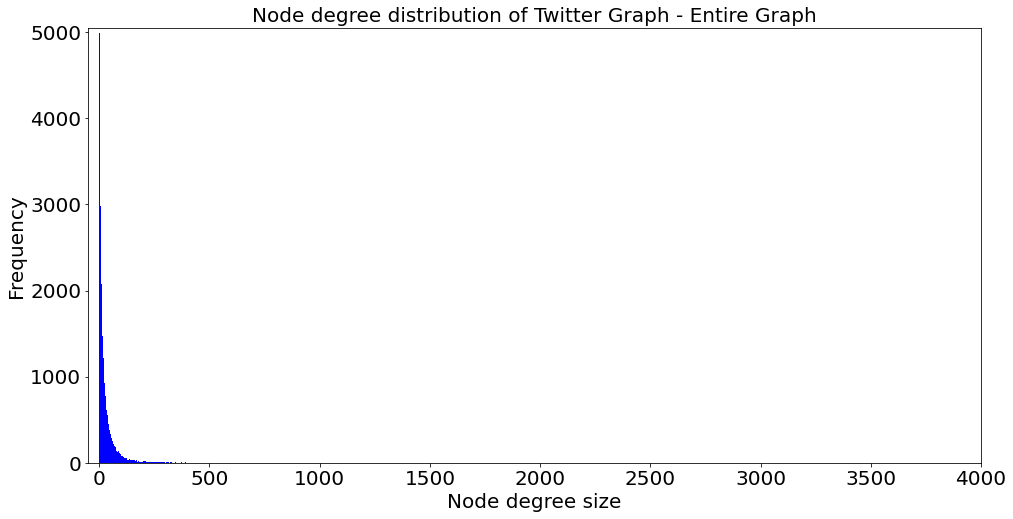

In [256]:
plt.figure(figsize=(16,8))

plt.bar(degSort, cntSort, width=1, color='b')
plt.xlabel("Node degree size", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([-50, 4000])
plt.ylim([ 0, 5050])
plt.title("Node degree distribution of Twitter Graph - Entire Graph", fontsize=20)
plt.show()

In [257]:
kmin = 1
Xo = np.array([np.log(i/kmin) for i in degSort])[degSort >= kmin].reshape(-1,1)
yo = np.array([np.log(i/np.sum(cntSort)) for i in cntSort])[degSort >= kmin].reshape(-1,1)

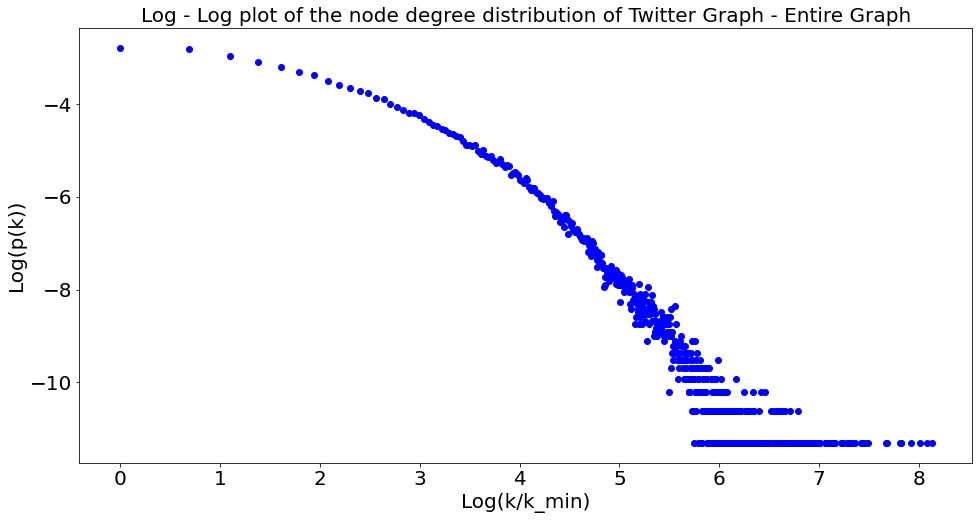

In [258]:
plt.figure(figsize=(16,8))

plt.scatter(Xo, yo, color='b')
plt.xlabel("Log(k/k_min)", fontsize=20)
plt.ylabel("Log(p(k))", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xlim([-50, 4000])
#plt.ylim([ 0, 5050])
plt.title("Log - Log plot of the node degree distribution of Twitter Graph - Entire Graph", fontsize=20)
plt.show()

In [279]:
kmin = 1
X = np.array([np.log(i/kmin) for i in degSort])[degSort >= kmin].reshape(-1,1)
y = np.array([np.log(i/np.sum(cntSort)) for i in cntSort])[degSort >= kmin].reshape(-1,1)

In [280]:
from sklearn import linear_model

# Linear regression model
model = linear_model.LinearRegression().fit(X, y)

In [281]:
alpha = -model.coef_[0][0]
alpha

1.8307650918760991

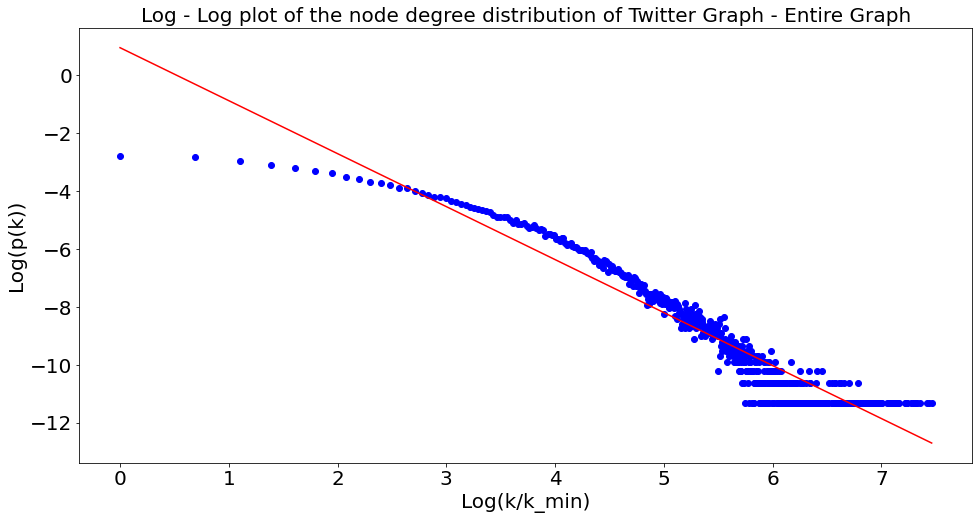

In [282]:
plt.figure(figsize=(16,8))

plt.scatter(X[0:-10], y[0:-10], color='b')
plt.plot(X[0:-10], model.predict(X[0:-10])[:,0], color='r')
plt.xlabel("Log(k/k_min)", fontsize=20)
plt.ylabel("Log(p(k))", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xlim([-50, 4000])
#plt.ylim([ 0, 5050])
plt.title("Log - Log plot of the node degree distribution of Twitter Graph - Entire Graph", fontsize=20)
plt.show()

In [283]:
kmin = 25
X = np.array([np.log(i/kmin) for i in degSort])[degSort >= kmin].reshape(-1,1)
y = np.array([np.log(i/np.sum(cntSort)) for i in cntSort])[degSort >= kmin].reshape(-1,1)

In [284]:
from sklearn import linear_model

# Linear regression model
model = linear_model.LinearRegression().fit(X, y)

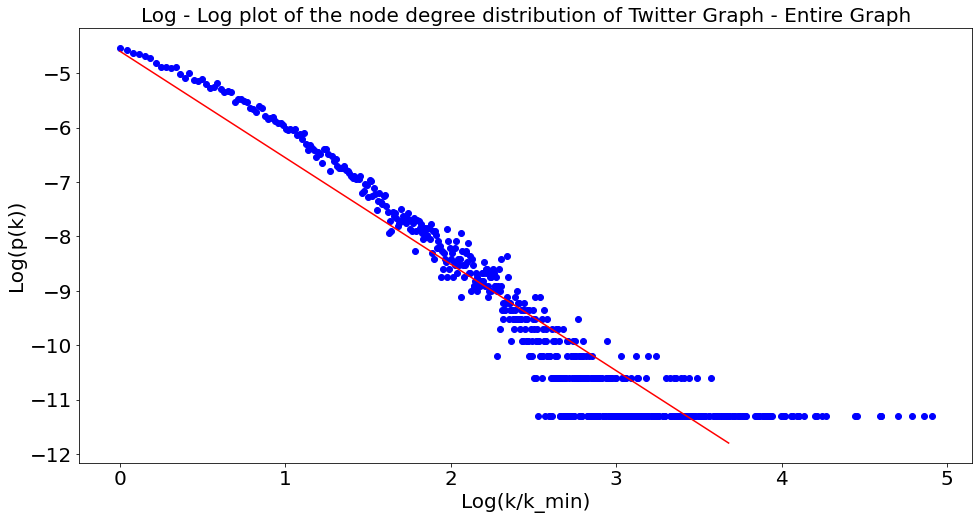

In [285]:
plt.figure(figsize=(16,8))

plt.scatter(X, y, color='b')
plt.plot(X[0:-50], model.predict(X[0:-50])[:,0], color='r')
plt.xlabel("Log(k/k_min)", fontsize=20)
plt.ylabel("Log(p(k))", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xlim([-50, 4000])
#plt.ylim([ 0, 5050])
plt.title("Log - Log plot of the node degree distribution of Twitter Graph - Entire Graph", fontsize=20)
plt.show()

In [286]:
alpha = -model.coef_[0][0]
alpha

1.9570763508711497

In [236]:
m = len(G_edges)
n = len(G_nodes)

p = 2*m/(n*(n-1))

In [287]:
nx.average_clustering(G)

0.565311468612065

In [291]:
# Network metric statistics
def network_metric_statistics(metric_data):
    avg = stats.mean(metric_data)
    med = stats.median(metric_data)
    std = stats.stdev(metric_data)
    
    return avg, med, std

In [292]:
# Transform degree view into a list.
degree_sequence = [node[1] for node in G.degree]

In [293]:
network_metric_statistics(degree_sequence)

(33.018719405701916, 15.0, 67.84397369049103)

In [294]:
# Calculate the mean geodesic distance
mean_geodesic_distance = nx.average_shortest_path_length(G)
mean_geodesic_distance

KeyboardInterrupt: 